In [1]:
import time

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
# Запись датасета из файла в переменную при помощи библиотеки pandas
dataset = pd.read_csv('IRIS.csv')
# Записываем тренировочные/тестовые данные и ответы в разные переменные
df = dataset.copy()  # dataframe
x = df.drop(['species'], axis=1)  # Тренировочные/тестовые
y = df['species']  # Ответы
#  Преобразование значений в числовые значения
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
# Разделение данных на тренировочные и тестовые(x_train - вход, y_train - выход)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Следующий блок кода расширяет тренировочные ответы для нейросети
# Это необходимо сделать, так как изначальные данные представлены в следующем в виде -
# [0 0 1 0 ... 0 1 2], где каждой цифре соответствует вид цветка. А нейросети для
# проверки насколько она ошиблась нужны данные вида: [[1, 0, 0], [1, 0, 0], ... [0, 0, 1]],
# где индекс цифры 1 в списках соответствует виду цветка.
new_y_train = []
for i in range(len(y_train)):
    new_y_train.append([1 if j == y_train[i] else 0 for j in range(3)])
y_train = new_y_train

new_y_test = []
for i in range(len(y_test)):
    new_y_test.append([1 if j == y_test[i] else 0 for j in range(3)])
y_test = new_y_test


 I:0 Error:0.993 Correct:0.275 Test-Acc:0.36666666666666664
 I:1 Error:0.810 Correct:0.275 Test-Acc:0.36666666666666664
 I:2 Error:0.782 Correct:0.2833333333333333 Test-Acc:0.36666666666666664
 I:3 Error:0.755 Correct:0.2916666666666667 Test-Acc:0.36666666666666664
 I:4 Error:0.728 Correct:0.3 Test-Acc:0.36666666666666664
 I:5 Error:0.702 Correct:0.3416666666666667 Test-Acc:0.36666666666666664
 I:6 Error:0.676 Correct:0.35833333333333334 Test-Acc:0.36666666666666664
 I:7 Error:0.652 Correct:0.36666666666666664 Test-Acc:0.36666666666666664
 I:8 Error:0.628 Correct:0.36666666666666664 Test-Acc:0.36666666666666664
 I:9 Error:0.604 Correct:0.375 Test-Acc:0.36666666666666664
 I:10 Error:0.582 Correct:0.4166666666666667 Test-Acc:0.36666666666666664
 I:11 Error:0.561 Correct:0.4666666666666667 Test-Acc:0.36666666666666664
 I:12 Error:0.540 Correct:0.49166666666666664 Test-Acc:0.36666666666666664
 I:13 Error:0.520 Correct:0.5416666666666666 Test-Acc:0.36666666666666664
 I:14 Error:0.502 Corre

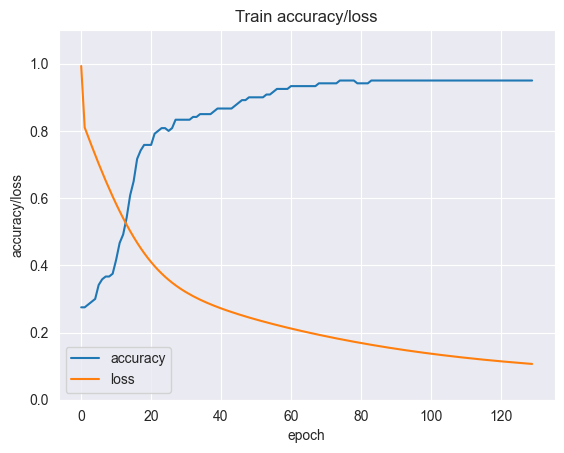

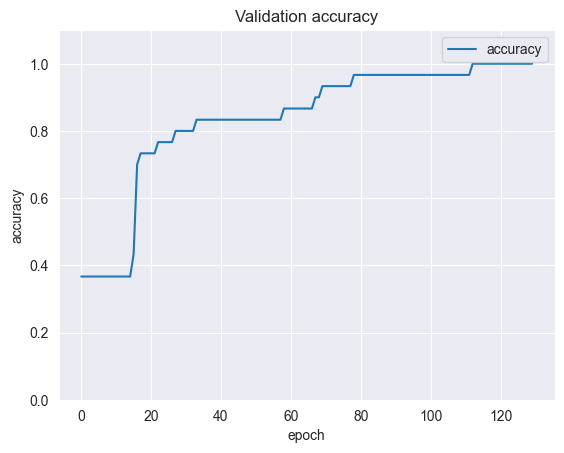

In [49]:
def relu(node):  # Функция активации relu
    return (node >= 0) * node

def relu2deriv(output):  # Производная от функции relu
    return output >= 0

def softmax(ner):  # Функция активации
    temp = np.exp(ner)  # применяемая к выходному слою
    return temp / np.sum(temp, axis=1, keepdims=True)


np.random.seed(8)
loss = []
accuracy = []
accuracy_test = []

# Объявление все нужные переменные, в том числе и веса между слоями
alpha, iterations, hidden_size, input_d, num_labels = (0.0005, 130, 8, 4, 3)
weights_0_1 = np.random.random((input_d, hidden_size))
weights_1_2 = np.random.random((hidden_size, num_labels))

for interation in range(iterations):  # Кол-во эпох
    error, correct_cnt = (0.0, 0)  # Процент ошибок(loss) и верных ответов(accuracy)
    for i in range(len(x_train)):
        layer_0 = x_train[i:i + 1]  # Входные данные
        # Проход вперёд через скрытый слой с функцией активации ReLU.
        layer_1 = relu(np.dot(layer_0, weights_0_1))
        # Проход вперёд через выходной слой с функцией активации softmax,
        # предсказывающий вероятности принадлежности к каждому классу.
        layer_2 = softmax(np.dot(layer_1, weights_1_2))

        # Вычисление ошибки по сравнению с целевым значением.
        error += np.sum((layer_2 - y_train[i:i + 1]) ** 2)
        # Подсчёт числа правильно классифицированных примеров.
        correct_cnt += int(np.argmax(layer_2) == np.argmax(y_train[i:i + 1]))
        # Вычисление ошибки для выходного слоя.
        layer_2_delta = (y_train[i:i + 1] - layer_2)
        # Обратное распространение ошибки к скрытому слою.
        layer_1_delta = layer_2_delta.dot(weights_1_2.T) * relu2deriv(layer_1)

        weights_1_2 += alpha * layer_1.T.dot(layer_2_delta) # Обновление весов
        weights_0_1 += alpha * layer_0.T.dot(layer_1_delta)

    sys.stdout.write(
        "\n" + " I:" + str(interation) + " Error:" + str(error / float(len(x_train)))[0:5] + " Correct:" + str(
            correct_cnt / float(len(x_train))))
    loss.append(error / float(len(x_train)))
    accuracy.append(correct_cnt / float(len(x_train)))

    correct_cnt = 0
    for i in range(len(x_test)):
        layer_0 = x_test[i:i + 1]
        layer_1 = relu(np.dot(layer_0, weights_0_1))
        layer_2 = np.dot(layer_1, weights_1_2)

        correct_cnt += int(np.argmax(layer_2) == np.argmax(y_test[i:i + 1]))

    sys.stdout.write(" Test-Acc:" + str(correct_cnt / float(len(x_test))))
    accuracy_test.append(correct_cnt / float(len(x_test)))

plt.plot([i for i in range(len(accuracy))], accuracy, label="accuracy")
plt.plot([i for i in range(len(loss))], loss, label="loss")
plt.title('Train accuracy/loss')
plt.xlabel('epoch')
plt.ylabel('accuracy/loss')
plt.legend(loc=0)
plt.ylim(0, 1.1)
plt.show()

plt.plot([i for i in range(len(accuracy))], accuracy_test, label="accuracy")
plt.title('Validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc=0)
plt.ylim(0, 1.1)
plt.show()

Ручной ввод данных

In [5]:

ans = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
while True:
    sepal_length = float(input("sepal_length = "))
    sepal_width = float(input("sepal_width = "))
    petal_length = float(input("petal_length = "))
    petal_width = float(input("petal_width = "))

    for i in range(len(x_test)):
        layer_0 = [sepal_length, sepal_width, petal_length, petal_width]
        layer_1 = relu(np.dot(layer_0, weights_0_1))
        layer_2 = np.dot(layer_1, weights_1_2)
    ind = np.argmax(layer_2)
    print(layer_2)
    print(ans[ind])
    time.sleep(2)

ValueError: could not convert string to float: ''